In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
import matplotlib as mpl

# plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,12)))
# plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab10.colors)
runstr='Dry'
df=pd.read_pickle('dfs/df_run_02_dry_delta_tab.pkl')

runstr='Wet'
df=pd.read_pickle('dfs/df_run_02_land_delta_tab.pkl')

df['tal']=round(df.t-df.tlf,5)

In [103]:
tmin=0
tmax=12
df=df[df.r.gt(0)]
df=df.query('r < rV10max*1.0')
df=df.query('t - tlf < ' + str(tmax) +'/24.')
df=df.query('t - tlf > ' + str(tmin) +'/24.')

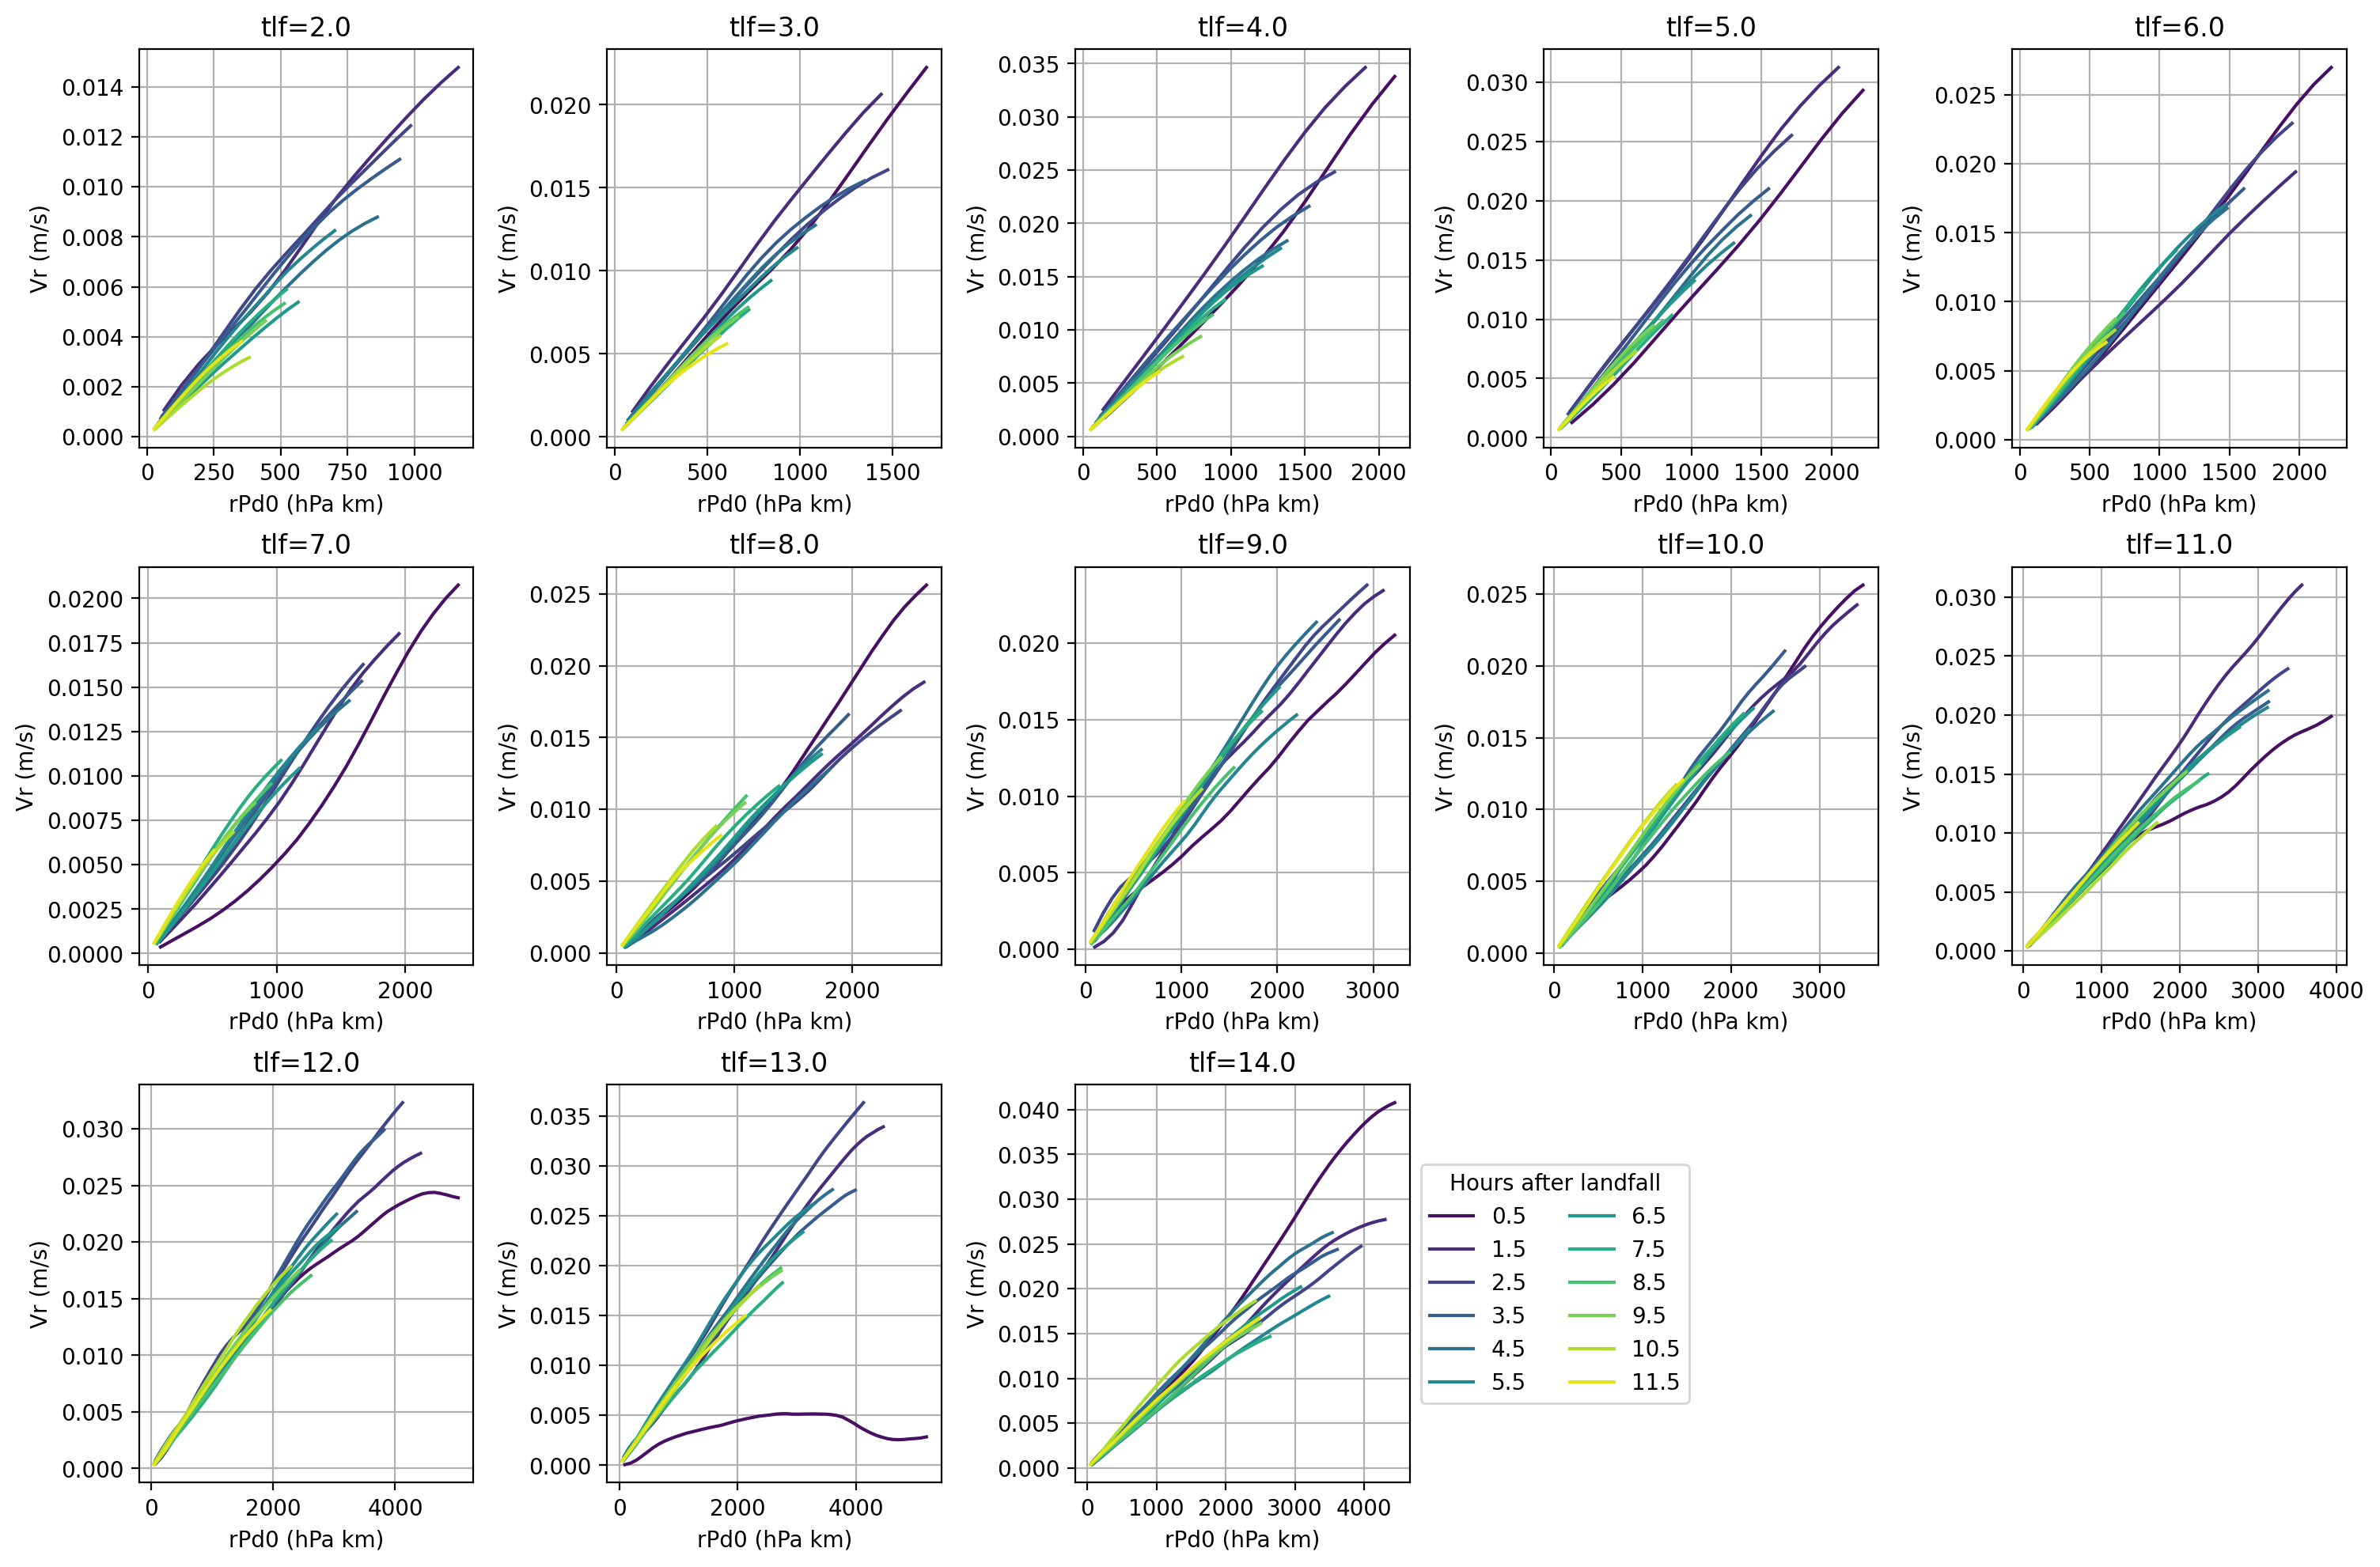

In [114]:
fig,axs=plt.subplots(3,5,dpi=200,figsize=(18,12))
plt.subplots_adjust(hspace=0.3,wspace=0.4)

cmap = mpl.cm.get_cmap('viridis')

tlfs=df.tlf.unique()
# tlfs=[tlfs[0]]
for tlf,ax in zip(tlfs,axs.flat):
    dfl=df[df.tlf.eq(tlf)]
    tals=sorted(dfl.tal.unique())
    for tal in tals:
        dft=dfl[dfl.tal.eq(tal)]
        Pmin=dft.Pmin.values[0]
#         print(Pmin)
        Pd=1016-Pmin
        r=dft.r
        x=np.sqrt(r)
        x=r*Pd
        y=dft.vrcol
        ax.plot(x,y,color=cmap(tal/(tmax/24)))
        ax.set_title('tlf='+str(tlf))
        ax.grid(True)
        ax.set_xlabel('rPd0 (hPa km)')
        ax.set_ylabel('Vr (m/s)')
        
ax.legend([round(tal*24,2) for tal in tals],loc='center left',\
          bbox_to_anchor=(1, 0.5),ncol=2,title='Hours after landfall')
    
for ax in axs.flat[len(tlfs):]:
    ax.axis('off')